In [1]:
import random
import math
from matplotlib import pyplot as plt
import numpy as np

def os(x): # returns probability of overshooting
  return 1-math.exp(x)*(1-x)
# def wrres(x,y): # returns probability of strategy x beating strategy y if they both don't overshoot
#   if (x < y): return 1 - wrres(y,x)
#   return (x*x*x-x*x*(2*y+1)+x*(y+2)*(3*y-2)+y*(10-y*(2*y+3))-6)/(12*(y-1))
# def wr(x,y): # returns overall probability of strategy x beating strategy y
#   if (x < y): return 1 - wr(y,x)
#   ox = os(x)
#   oy = os(y)
#   w = wrres(x,y)
#   return (1-ox)*(oy+(1-oy)*w)/(1-ox*oy)
# def simduel(x,y):
#     while (True):
#       low_pos, high_pos = 0,0
#       while low_pos < x:
#         low_pos += random.random()
#       while high_pos < y:
#         high_pos += random.random()
#       if high_pos <= 1 or low_pos <= 1:
#         break
#     if (high_pos > 1) and (low_pos <= 1):
#       return 1
#     elif low_pos > 1 and high_pos <= 1:
#       return 0
#     else:
#       low_pos += random.random()
#       high_pos += random.random()
#       return 1*(low_pos > high_pos)
# wr(0.49999,0.5)


In [2]:
# needed for higher number of decimal places precision
from mpmath import *
mp.dps = 100
def mpos(x): # returns probability of overshooting
  return mpf(1)-mp.exp(x)*mpf(1-x)
def mpwrres(x,y): # returns probability of strategy x beating strategy y if they both don't overshoot
  if (x < y): return mpf(1) - mpwrres(y,x)
  x = mpf(x)
  y = mpf(y)
  return (x*x*x-x*x*(mpf(2)*y+mpf(1))+x*(y+mpf(2))*(mpf(3)*y-mpf(2))+y*(mpf(10)-y*(mpf(2)*y+mpf(3)))-mpf(6))/(mpf(12)*(y-mpf(1)))
def mpwr(x,y): # returns overall probability of strategy x beating strategy y
  if (x < y): return mpf(1) - mpwr(y,x)
  ox = mpos(x)
  oy = mpos(y)
  w = mpwrres(x,y)
  return mpf((mpf(1)-ox)*(oy+(mpf(1)-oy)*w)/(mpf(1)-ox*oy))

0.4161953548582363
9.992240416058543e-19
0.11484588598134082
0.41619535485824527
0.1148458859813466


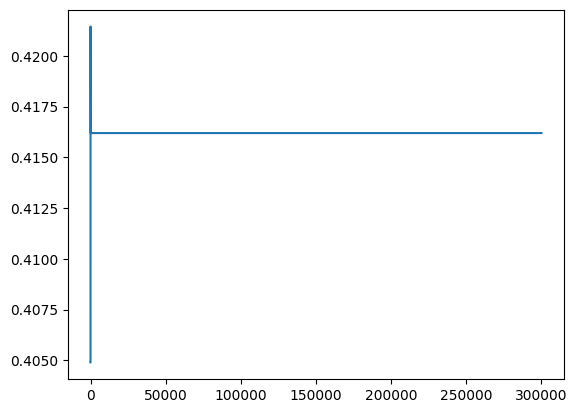

In [3]:
# We try to find optimal threshold t by simulated annealing

t = 0.4
max_step = 0.15*10**-2
t_values = []
for i in range(300000):
  rand_num = 2*random.random()-1
  #randomly sometimes multiplty it by up to 32
  rand_num *= 2**(random.random()*5)
  #randomly introduce larger jumps
  if (random.random()>0.85): rand_num *= 10**(random.random()*10//1)
  new_contender = min(t + max_step*rand_num,1)
  if mpwr(t,new_contender) < 0.5:
    if (i>299700): print(mpwr(t,new_contender))
    t = new_contender
  t_values.append(t)
  if (max_step > 10**-18): max_step *= 0.99
#plt.plot(t_values)
print(t)
print(max_step)
print(os(t))
plt.plot(t_values)
print(sum(t_values[-5000:])/5000)
print(os(sum(t_values[-5000:])/5000))

0.4161953548582363
9.90279143053719e-19
0.11484588598134082
0.41619535485824527
0.1148458859813466


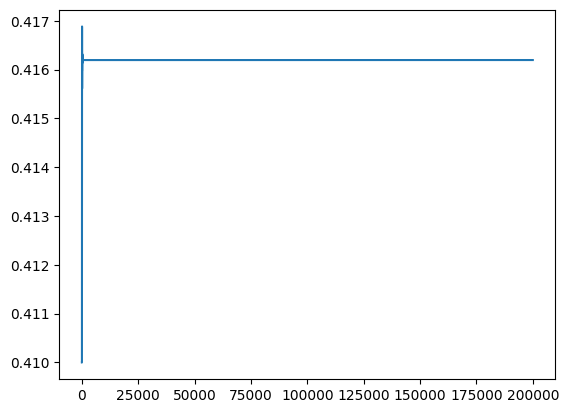

In [4]:
# We try to find optimal threshold t by repeatedly guessing

t = 0.41
max_step = 0.15*10**-1
t_values = []
for i in range(200000):
  rand_num = 2*random.random()-1
  #randomly sometimes multiplty it by up to 32
  rand_num *= 2**(random.random()*5)
  #randomly introduce larger jumps
  if (random.random()>0.85): rand_num *= 10**(random.random()*10//1)
  new_contender = min(t + max_step*rand_num,1)
  if mpwr(t,new_contender) < 0.5:
    if (i>299700): print(mpwr(t,new_contender))
    t = new_contender
  t_values.append(t)
  if (max_step > 10**-18): max_step *= 0.99
#plt.plot(t_values)
print(t)
print(max_step)
print(os(t))
plt.plot(t_values)
print(sum(t_values[-5000:])/5000)
print(os(sum(t_values[-5000:])/5000))